In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import copy

vir = copy(mpl.cm.viridis)
vir.set_under("lightgray")

sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(figsize = [12,10],dpi =100, facecolor='white')

In [ ]:
adata = sc.read_h5ad('AP_CONTROL_BRN12.h5ad')
adata.var_names_make_unique()

In [3]:
adata = adata[adata.obs['Batch']!=1,:]

In [4]:
adata.layers['plot'] = np.log1p(adata.X)
adata.layers['count'] = adata.X.copy()

C:\Users\MUELLE~1\AppData\Local\Temp/ipykernel_548/3028614634.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.layers['plot'] = np.log1p(adata.X)


In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [6]:
adata.obs['Batch'] = adata.obs['Batch'].astype('category')
adata.obs['age.x'] = adata.obs['age.x'].astype('category')
adata.obs['Batch.x'] = adata.obs['Batch.x'].astype('category')

In [7]:
sc.pp.scale(adata)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    with n_comps=50
    finished (0:00:05)


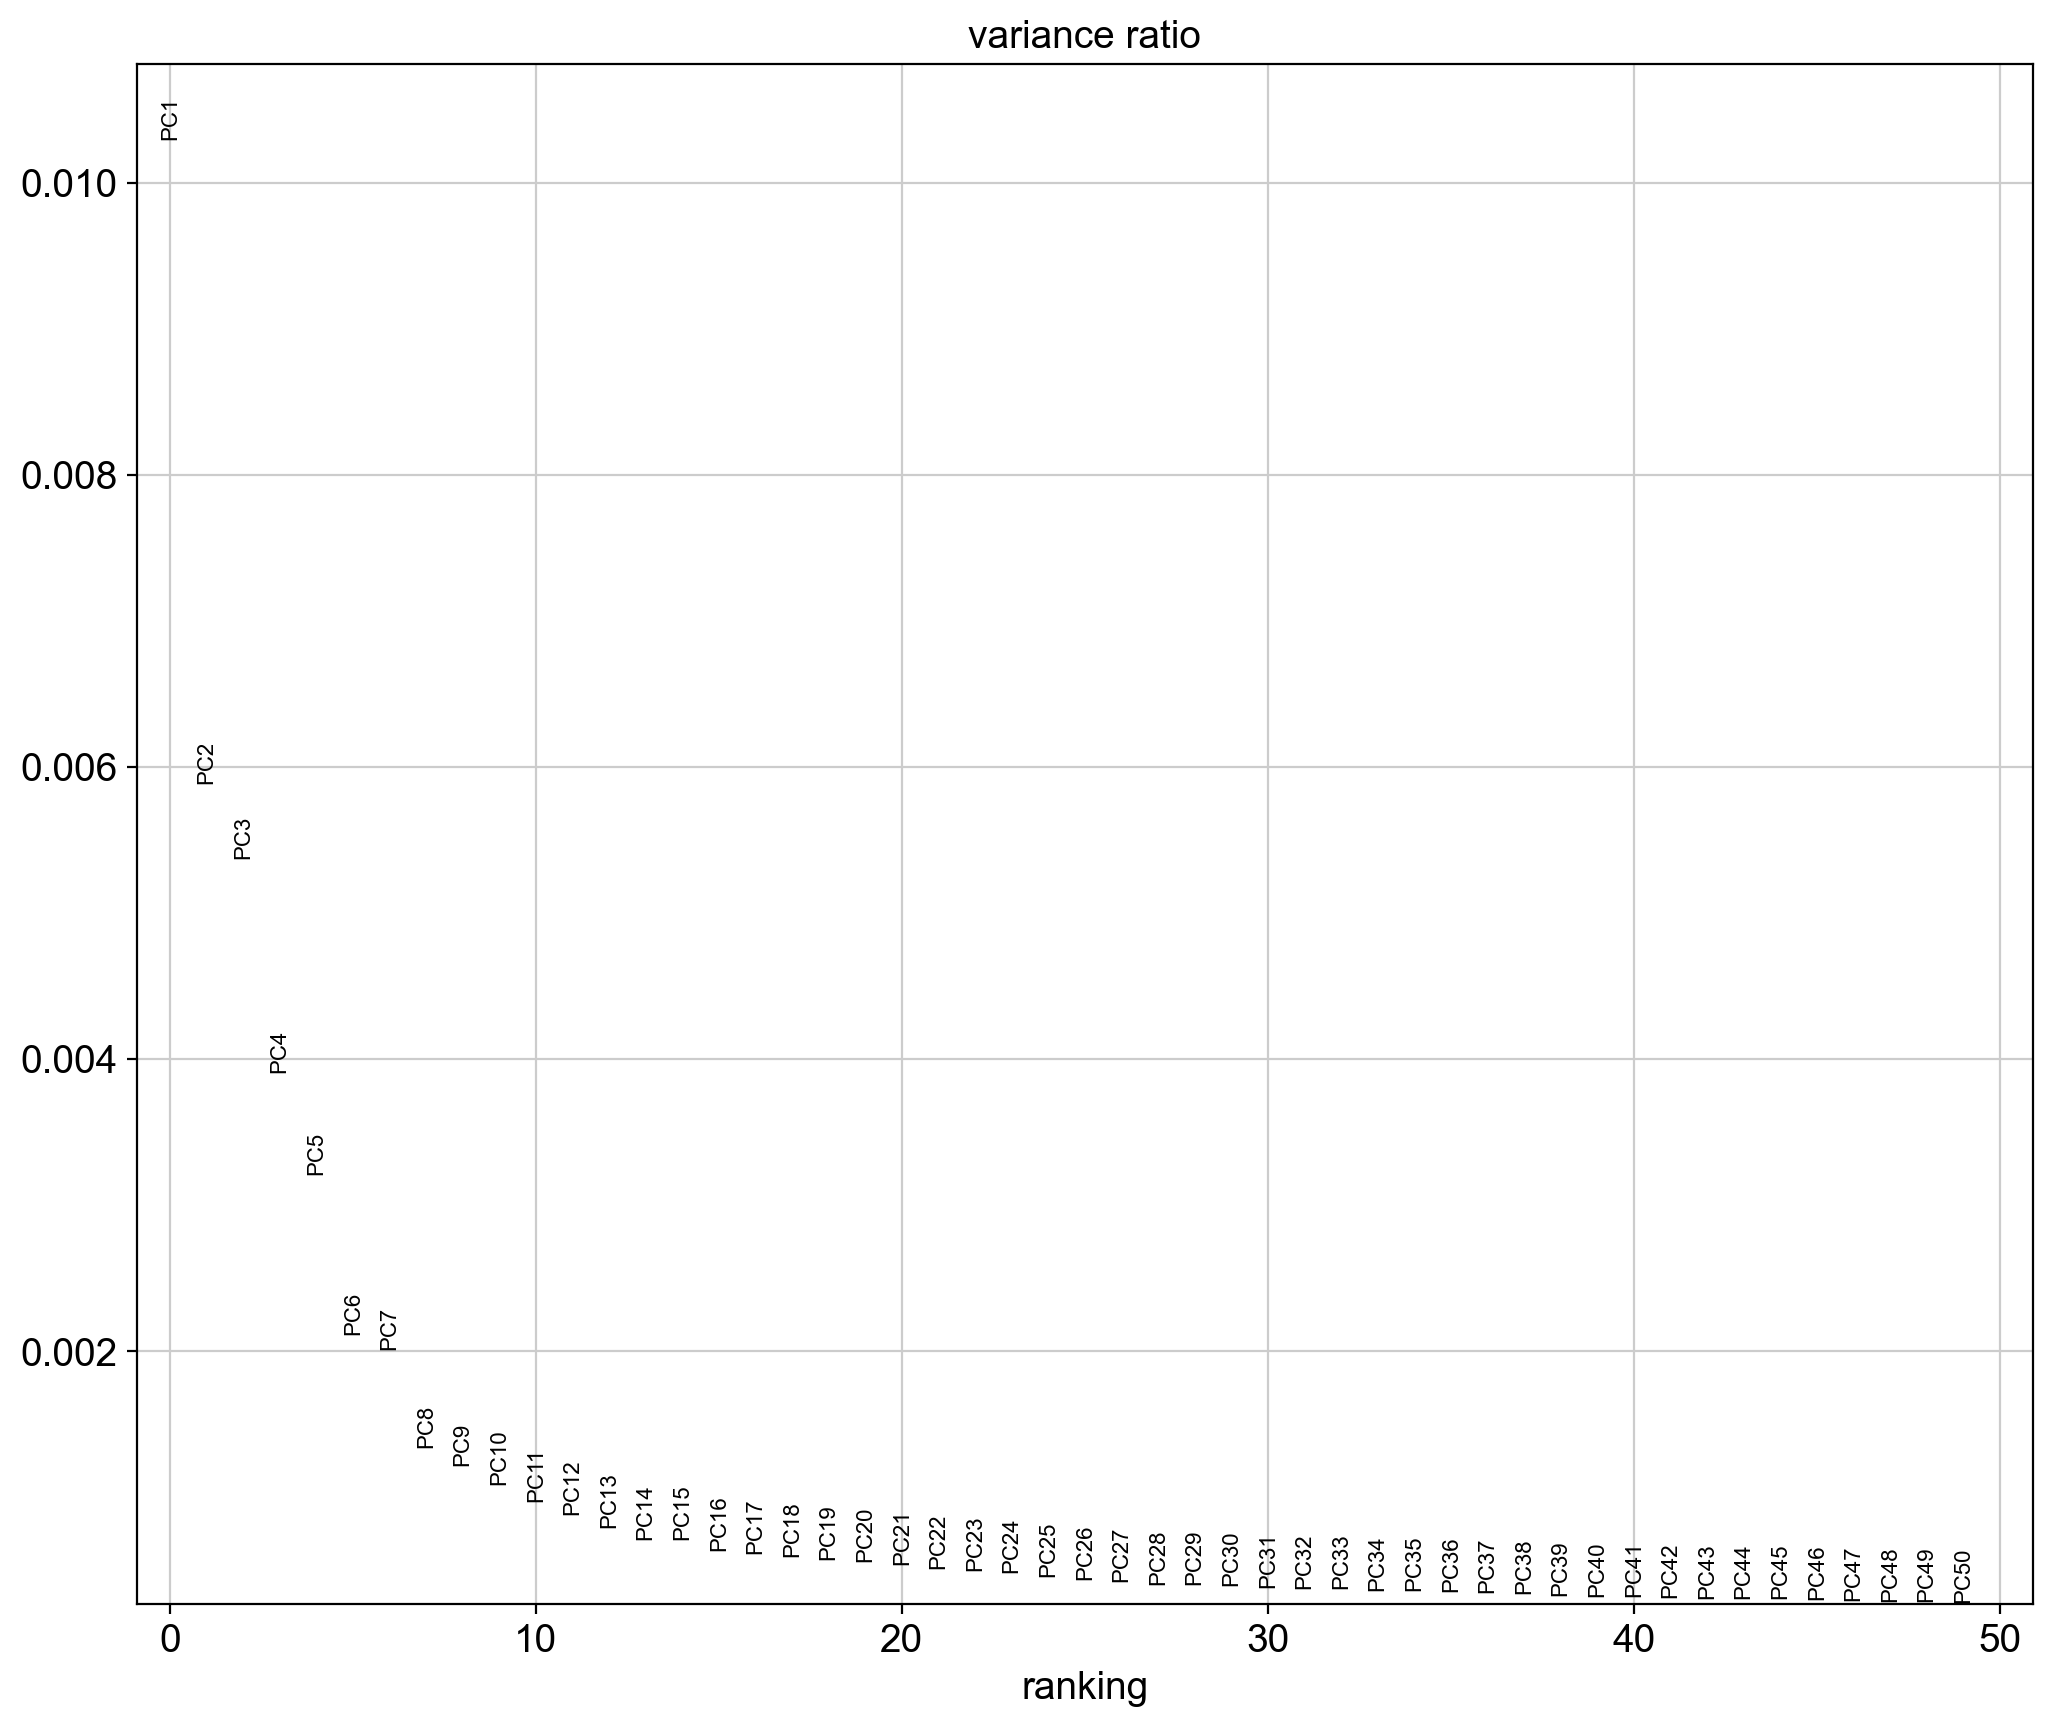

In [8]:
sc.tl.pca(adata,svd_solver = 'auto')
sc.pl.pca_variance_ratio(adata,n_pcs=50)

c:\users\mueller lab\appdata\local\programs\python\python38\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


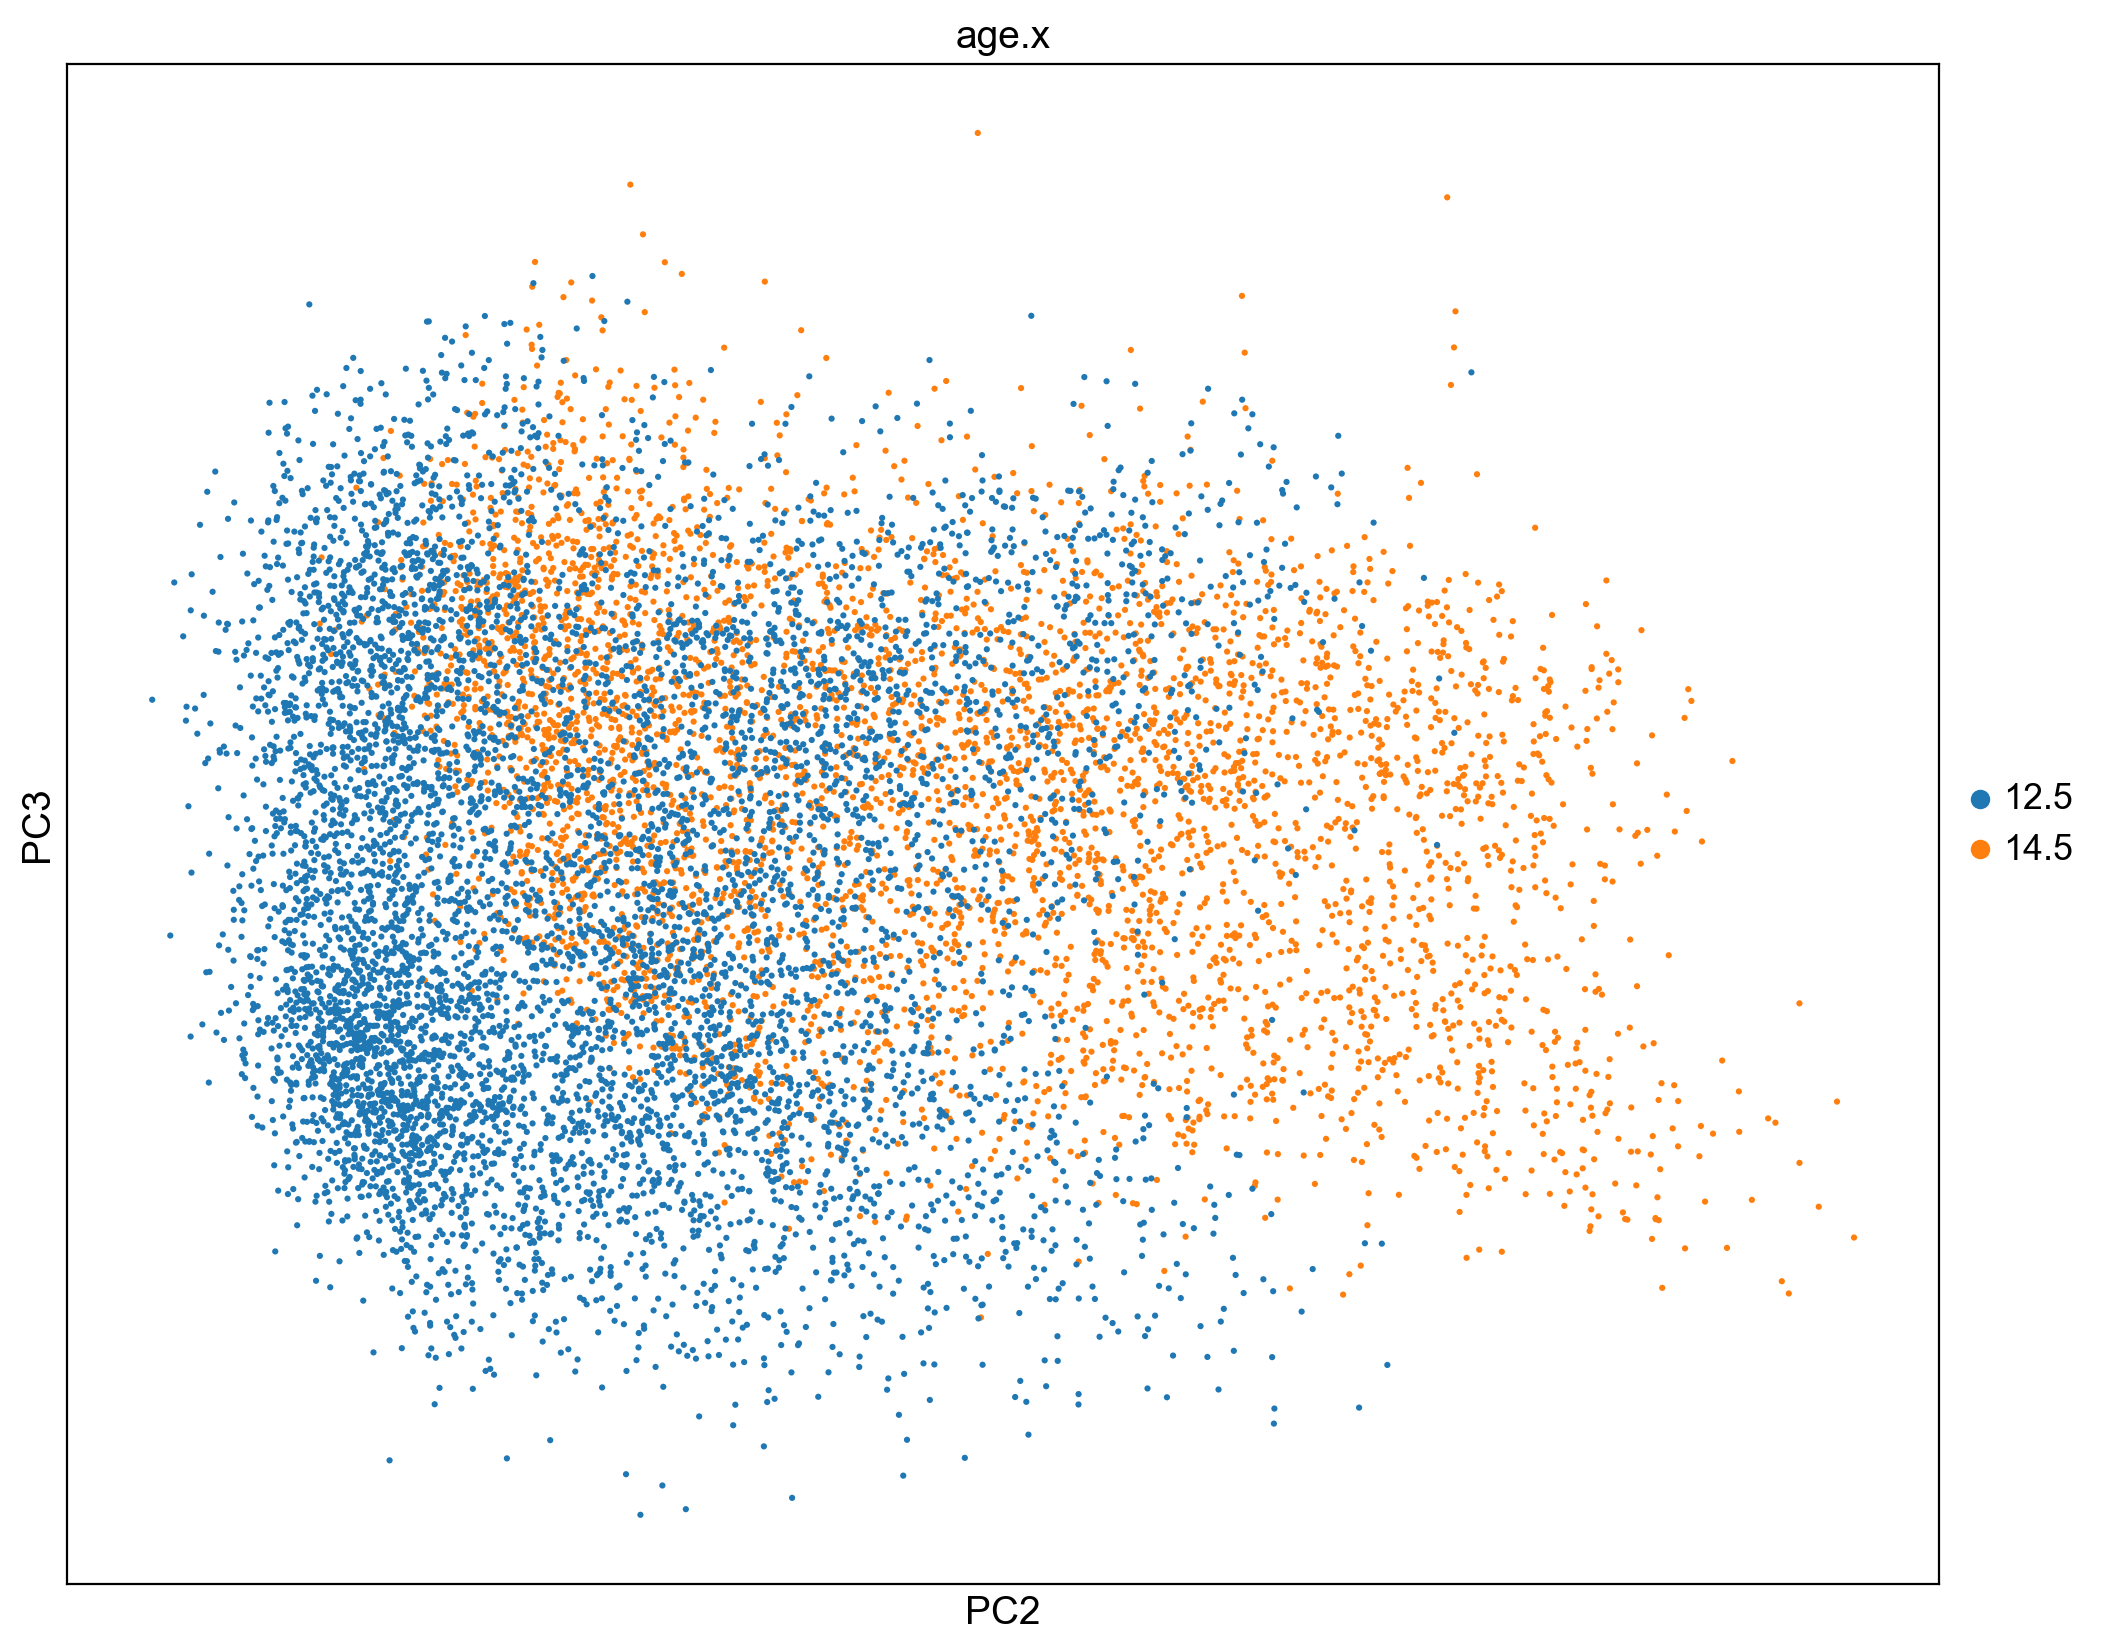

In [9]:
sc.pl.pca(adata,color = ['age.x'],size = 20,components = ['2,3'])

In [10]:
from princurve import NLPCA

pca = NLPCA()

data_new = pca.preprocess( [adata.obsm['X_pca'][:,1],adata.obsm['X_pca'][:,2]] )

pca.fit(data_new, epochs = 150, nodes = 15, lr = .002, verbose = 1)

proj, curve_pts = pca.project(data_new)

Epoch 1/150
371/371 [==============================] - 0s 439us/step - loss: 13.9678
Epoch 2/150
371/371 [==============================] - 0s 450us/step - loss: 6.9614
Epoch 3/150
371/371 [==============================] - 0s 446us/step - loss: 5.1084
Epoch 4/150
371/371 [==============================] - 0s 439us/step - loss: 4.5293
Epoch 5/150
371/371 [==============================] - 0s 434us/step - loss: 4.0462
Epoch 6/150
371/371 [==============================] - 0s 430us/step - loss: 3.7031
Epoch 7/150
371/371 [==============================] - 0s 447us/step - loss: 3.5340
Epoch 8/150
371/371 [==============================] - 0s 446us/step - loss: 3.4612
Epoch 9/150
371/371 [==============================] - 0s 428us/step - loss: 3.4283
Epoch 10/150
371/371 [==============================] - 0s 434us/step - loss: 3.4063
Epoch 11/150
371/371 [==============================] - 0s 429us/step - loss: 3.4039
Epoch 12/150
371/371 [==============================] - 0s 447us/step - l

371/371 [==============================] - 0s 444us/step - loss: 3.3610
Epoch 98/150
371/371 [==============================] - 0s 442us/step - loss: 3.3573
Epoch 99/150
371/371 [==============================] - 0s 437us/step - loss: 3.3525
Epoch 100/150
371/371 [==============================] - 0s 439us/step - loss: 3.3547
Epoch 101/150
371/371 [==============================] - 0s 452us/step - loss: 3.3586
Epoch 102/150
371/371 [==============================] - 0s 436us/step - loss: 3.3549
Epoch 103/150
371/371 [==============================] - 0s 442us/step - loss: 3.3554
Epoch 104/150
371/371 [==============================] - 0s 440us/step - loss: 3.3533
Epoch 105/150
371/371 [==============================] - 0s 428us/step - loss: 3.3552
Epoch 106/150
371/371 [==============================] - 0s 440us/step - loss: 3.3532
Epoch 107/150
371/371 [==============================] - 0s 440us/step - loss: 3.3558
Epoch 108/150
371/371 [==============================] - 0s 452us/step

Text(0.5, 1.0, 'pseudotime')

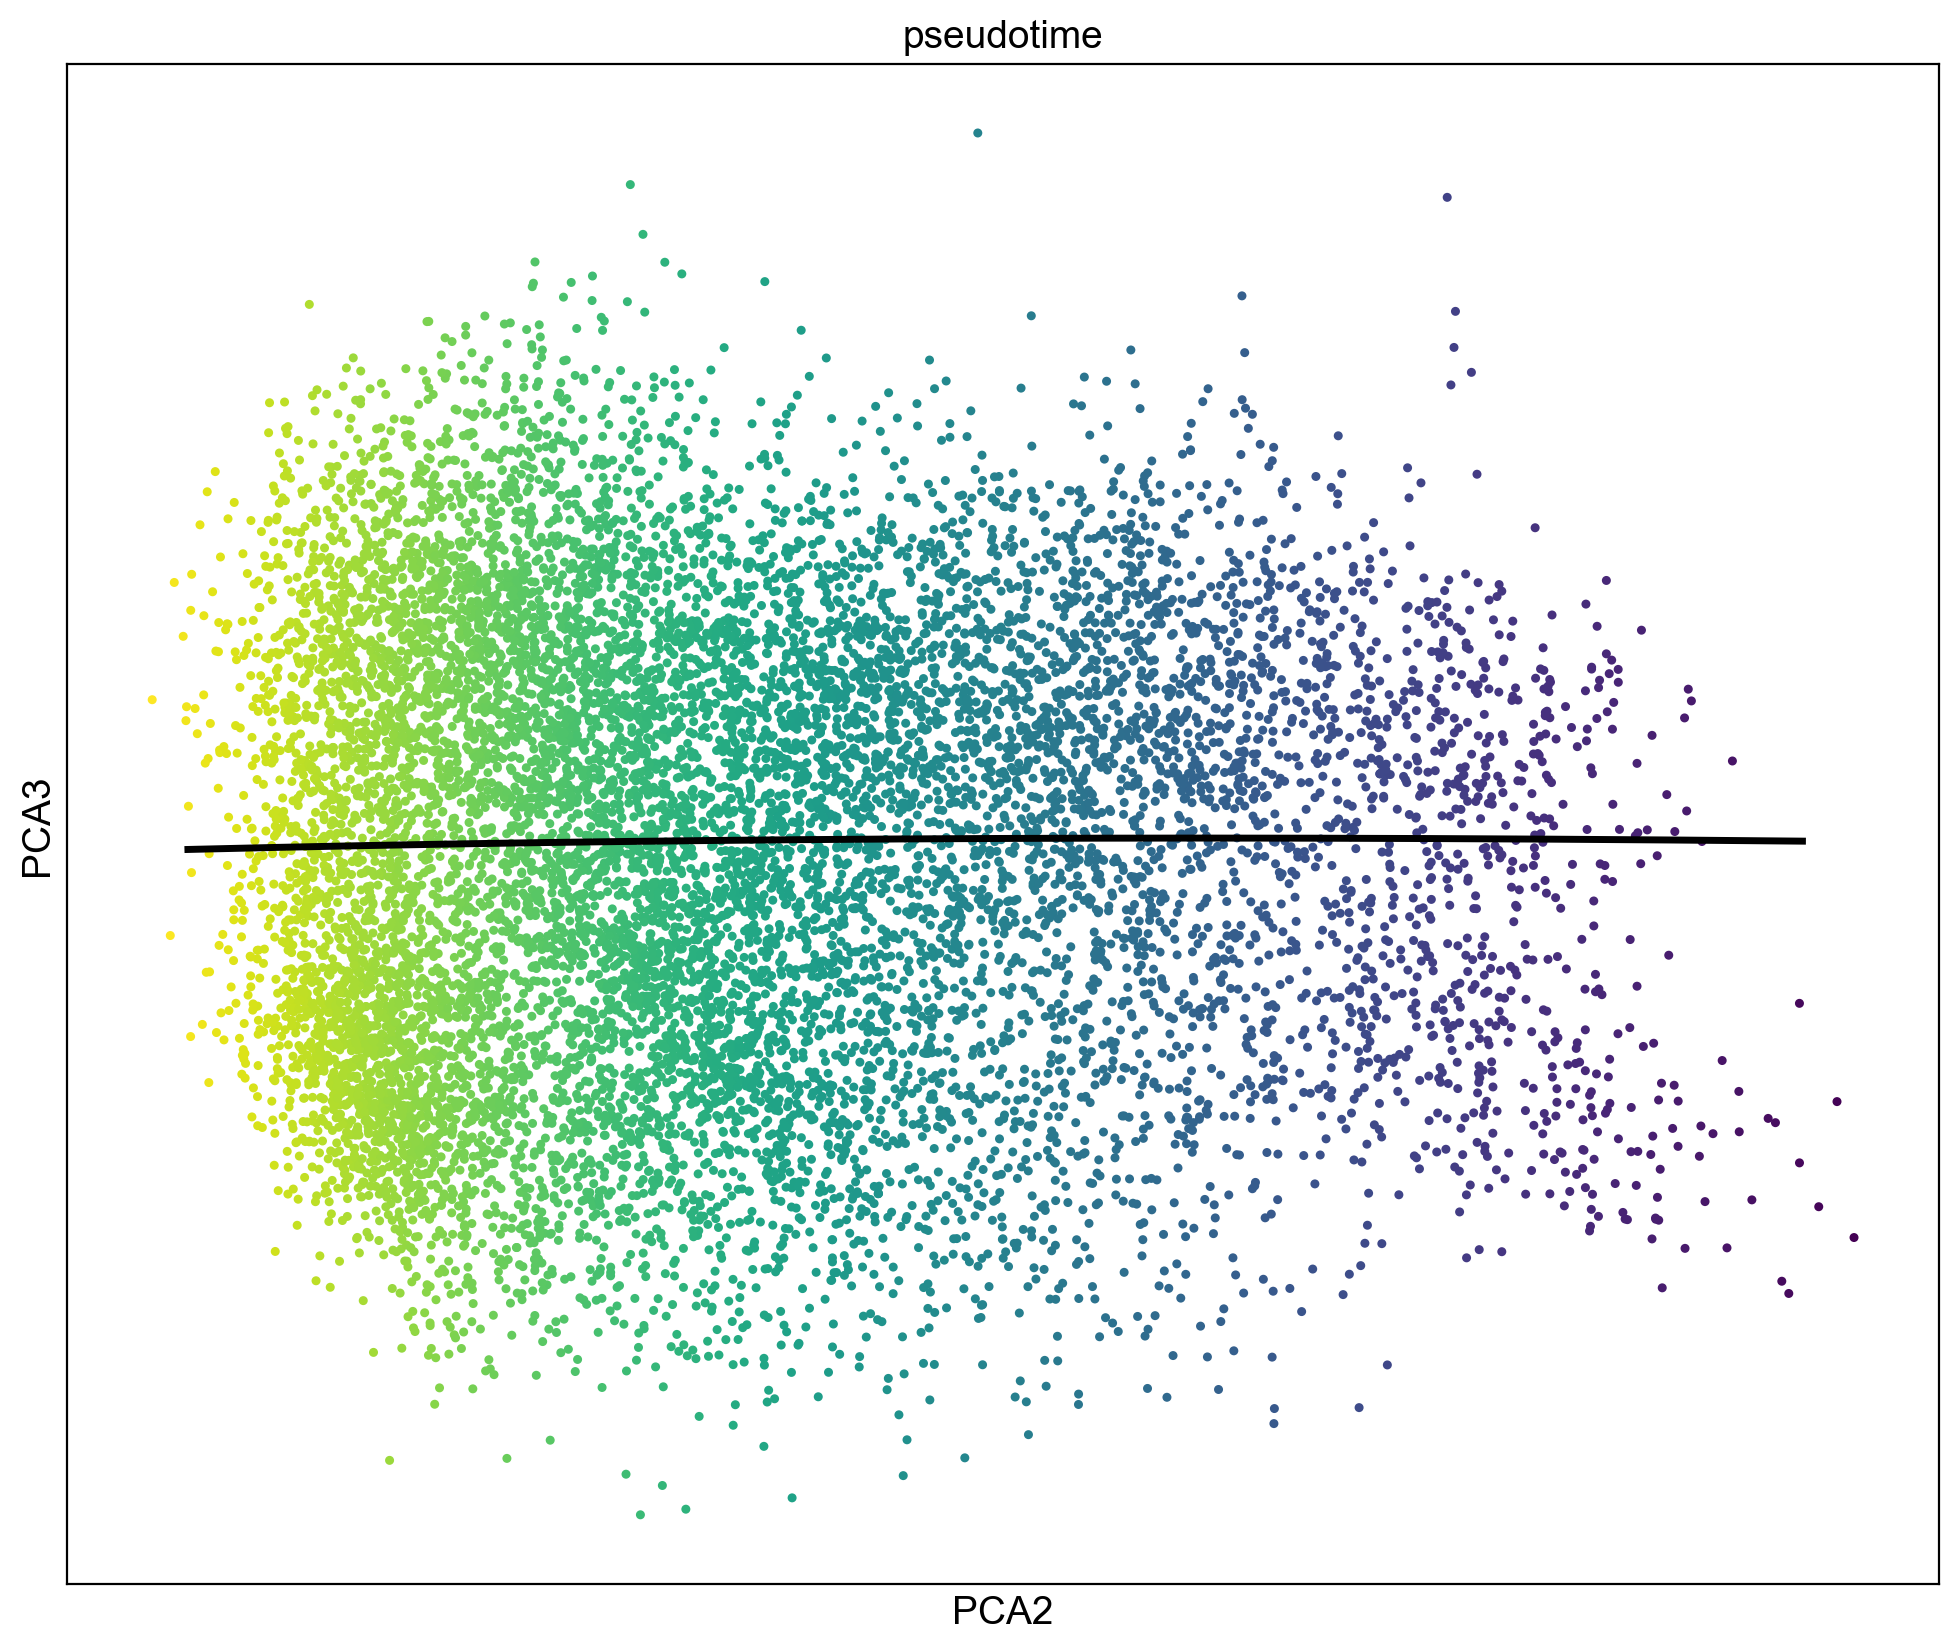

In [11]:
plt.scatter(data_new[:,0], 
            data_new[:,1], 
            s = 5, 
            c = proj.reshape(-1), 
            cmap = 'viridis')
#plt.colorbar()
plt.plot(curve_pts[:,0], 
         curve_pts[:,1], 
         color = 'black',
         linewidth = '2.5')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('PCA2')
plt.ylabel('PCA3')
plt.title('pseudotime')
#plt.savefig('ct_pseudotime.pdf')

In [12]:
adata.obs['pseudotime'] = (proj - max(proj))/(min(proj) - max(proj))
adata.obs['pseudotime'].to_csv('ct_pseudotime.csv')